In [43]:
import numpy as np


def read_matrix_from_file(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        matrix = [[int(x) for x in line.split()] for line in lines[1:]]
    return np.array(matrix)


matrix1 = read_matrix_from_file("matrix1.txt")
matrix2 = read_matrix_from_file("matrix2.txt")
result_matrix_cpp = read_matrix_from_file("result_matrix.txt")

result_matrix_numpy = np.dot(matrix1, matrix2)

if np.array_equal(result_matrix_numpy, result_matrix_cpp):
    print("Результаты совпадают")
else:
    print("Результаты не совпадают")

Результаты совпадают


In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import statistics as st
import pandas as pd


def read_results(filename):
    sizes = []
    computation_times = []
    with open(filename, 'r') as file:
        while True:
            tmp = []
            size_line = file.readline().strip()
            if not size_line:
                break
            size = int(size_line)
            task_size = int(file.readline().strip())
            for i in range(0, 10):
                comp_time = file.readline().strip()
                if not comp_time:
                    break
                tmp.append(int(comp_time))

            sizes.append(size)
            computation_times.append(tmp)
    return sizes, computation_times


def plot_intervals(sizes, intervals):
    means = [interval[0] for interval in intervals]
    lower_bounds = [interval[1][0] for interval in intervals]
    upper_bounds = [interval[1][1] for interval in intervals]

    plt.errorbar(sizes, means, yerr=[(upper-lower)/2 for upper, lower in zip(upper_bounds, lower_bounds)], fmt='o-', capsize=5)
    plt.xlabel('Размер матрицы')
    plt.ylabel('Время умножения')
    plt.show()


def get_intervals(computation_times):
    gamma = 0.95
    intervals = []
    for time in computation_times:
        n = len(time)
        x_mean = np.mean(time)
        s = np.sqrt(st.variance(time))
        confidence_interval = sts.t.interval(gamma, df=n-1, loc=x_mean, scale=s/np.sqrt(n))
        intervals.append([x_mean, confidence_interval])
    return intervals



sizes, computation_times = read_results("stats.txt")
arr = pd.DataFrame({"sizes":sizes, "times":computation_times})
intervals = get_intervals(computation_times)

In [45]:
arr

,sizes,times
0,500,"[1360, 679, 650, 635, 653, 652, 642, 652, 641,..."
1,600,"[1129, 1096, 1115, 1135, 1117, 1097, 1098, 119..."
2,700,"[1887, 2427, 1962, 2200, 2682, 2133, 2123, 214..."
3,800,"[3368, 2741, 3519, 3442, 3262, 3120, 3334, 356..."
4,900,"[4549, 4481, 4062, 4128, 4504, 4009, 4256, 408..."
5,1000,"[6080, 6299, 6252, 6166, 6260, 6521, 7317, 712..."
6,1100,"[7779, 7779, 7805, 7768, 7533, 8278, 8361, 796..."
7,1200,"[10671, 12228, 11380, 11546, 11936, 12880, 122..."
8,1300,"[16410, 16668, 16137, 16544, 16803, 16373, 167..."
9,1400,"[18119, 17766, 18880, 18784, 18438, 18488, 193..."


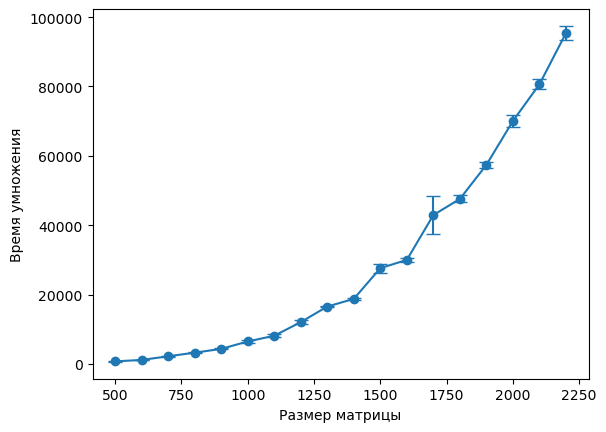

In [46]:
plot_intervals(sizes, intervals)

Процессор	Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz   2.40 GHz

Оперативная память	16,0 ГБ (доступно: 15,8 ГБ)

Тип системы	64-разрядная операционная система, процессор x64


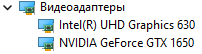

В ходе проведенных измерений по графику видно, что зависимость времени вычисления произведения матриц от их размерности стремится к О(n^2).